# **Data Analytics Salary Prediction**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv('Salary Dataset.csv')

In [3]:
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [4]:
df.describe()

,Salaries Reported
count,4342.000000
mean,2.775910
std,5.146527
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,105.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [6]:
df.isna().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [7]:
df['Job Title'].value_counts()

Data Scientist                              1844
Data Analyst                                 990
Data Engineer                                805
Machine Learning Engineer                    568
Data Science                                  43
Senior Data Scientist                         39
Junior Data Scientist                         18
Senior Machine Learning Engineer               9
Lead Data Scientist                            6
Software Engineer - Machine Learning           2
Machine Learning Developer                     2
Machine Learning Consultant                    2
Machine Learning Scientist                     2
Machine Learning Data Associate II             2
Machine Learning Associate                     1
Machine Learning Data Associate                1
Data Science Associate                         1
Machine Learning Engineer/Data Scientist       1
Data Science Consultant                        1
Associate Machine Learning Engineer            1
Data Scientist - Tra

In [8]:
df['Location'].unique()

array(['Bangalore', 'Pune', 'Hyderabad', 'New Delhi', 'Mumbai'],
      dtype=object)

### Processing in Salary Column

In [9]:
df['Salary'].apply(lambda x : x.split('/')[-1]).unique()

array(['yr', 'mo', 'hr'], dtype=object)

In [10]:
df['Salary'].apply(lambda x : x[0]).unique()

array(['₹', '$', '£', 'A'], dtype=object)

In [11]:
def convert(salary):
    Currency = salary[0]
    fre = salary.split('/')[-1]
    fsalary = float(salary.split('/')[0][1:].replace(',', '').replace('FN', ''))
    
    if Currency == '₹' :
        fsalary *= 0.013  
    elif Currency == '£' :
        fsalary *= 1.36  
    elif Currency == 'A' :
        fsalary *= 0.011  
        
    if fre == 'mo':
        fsalary *= 12   
    elif fre == 'hr':
        fsalary *= 1920 
    
    return fsalary

In [12]:
df['Salary ($/yr)'] = df['Salary'].apply(convert)
df.drop('Salary', axis=1, inplace=True)

In [13]:
df.head(10)

,Company Name,Job Title,Salaries Reported,Location,Salary ($/yr)
0,Mu Sigma,Data Scientist,105.0,Bangalore,8431.449
1,IBM,Data Scientist,95.0,Bangalore,15495.350
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,10879.362
3,Impact Analytics,Data Scientist,40.0,Bangalore,8704.514
4,Accenture,Data Scientist,32.0,Bangalore,12273.430
5,Infosys,Data Scientist,30.0,Bangalore,11813.932
6,Capgemini,Data Scientist,28.0,Bangalore,12039.612
7,Cognizant Technology Solutions,Data Scientist,26.0,Bangalore,9577.204
8,Anheuser-Busch InBev,Data Scientist,25.0,Bangalore,21407.373
9,Fractal,Data Scientist,22.0,Bangalore,18108.480


In [14]:
df.describe().round(3)

,Salaries Reported,Salary ($/yr)
count,4342.000,4344.000
mean,2.776,14762.570
std,5.147,58517.634
min,1.000,140.582
25%,1.000,5460.000
50%,1.000,9212.749
75%,3.000,15600.000
max,105.000,2277730.720


In [15]:
df['Job Title'].unique()

array(['Data Scientist', 'Data Science Associate',
       'Data Science Consultant', 'Data Science', 'Senior Data Scientist',
       'Junior Data Scientist', 'Lead Data Scientist',
       'Data Science Manager', 'Data Scientist - Trainee',
       'Data Science Lead', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Software Engineer - Machine Learning',
       'Machine Learning Engineer/Data Scientist',
       'Machine Learning Consultant', 'Machine Learning Data Associate',
       'Machine Learning Data Associate I', 'Machine Learning Associate',
       'Machine Learning Data Associate II',
       'Associate Machine Learning Engineer',
       'Machine Learning Data Analyst',
       'Senior Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer'], dtype=object)

In [16]:
df.columns

Index(['Company Name', 'Job Title', 'Salaries Reported', 'Location',
       'Salary ($/yr)'],
      dtype='object')

In [17]:
avg_salary = df.groupby('Location').mean().reset_index()
avg_salary

,Location,Salaries Reported,Salary ($/yr)
0,Bangalore,3.091540,15629.121575
1,Hyderabad,2.493274,15885.718999
2,Mumbai,2.562399,13384.114702
3,New Delhi,3.393893,10901.100916
4,Pune,2.061200,16302.453042


## **EDA AND DATA VISUALIZATION**

### Plotting Average Salary per year group by Location

In [18]:
px.bar(data_frame=avg_salary,x='Location',y='Salary ($/yr)',color='Location',title='Average Salary per year group by Location')

### Plotting the average Salaries for each job

<AxesSubplot:xlabel='Job Title'>

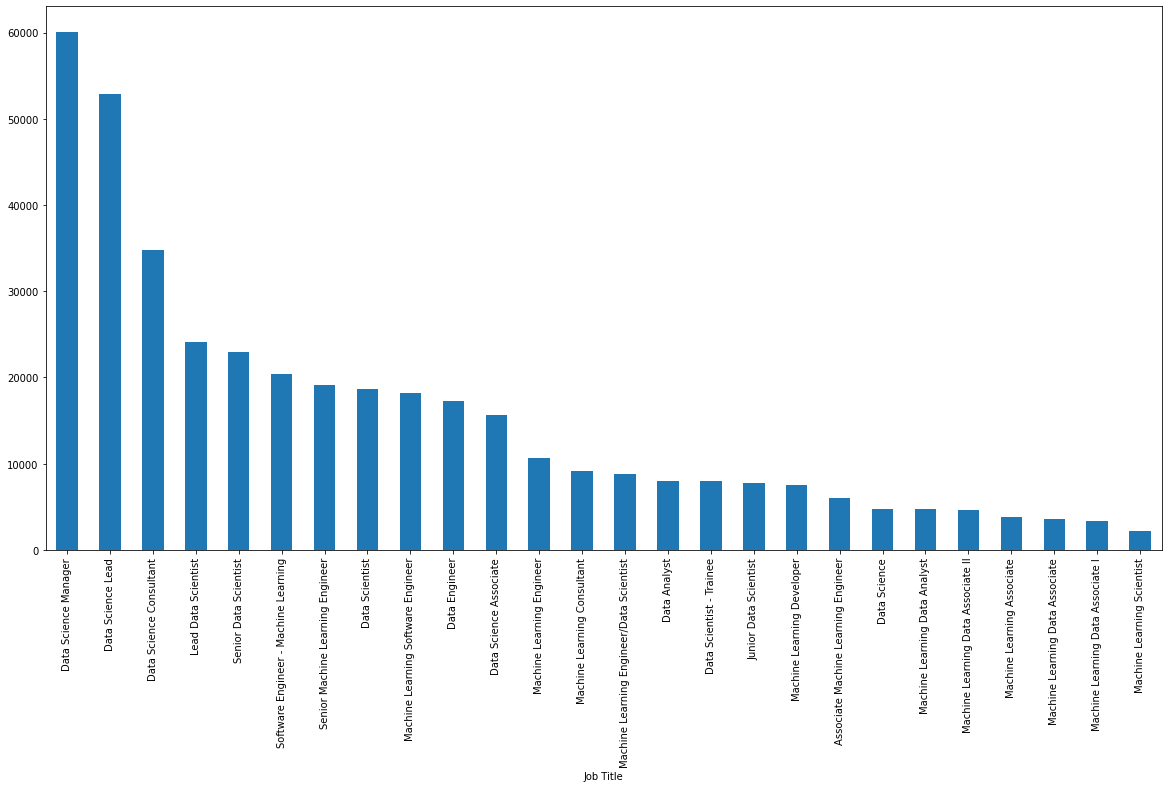

In [19]:
plt.figure(figsize=(20, 10))
df.groupby('Job Title')['Salary ($/yr)'].mean().sort_values(ascending=False).plot(kind='bar')

### Plotting the distribution of top 6 Job

<AxesSubplot:ylabel='Job Title'>

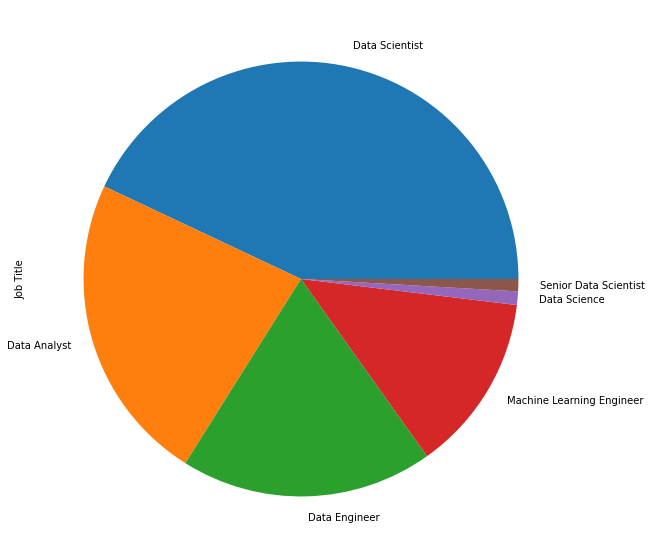

In [20]:
plt.figure(figsize=(10, 10))
top5jobs = df['Job Title'].value_counts().sort_values(ascending=False).head(6)
top5jobs.plot(kind='pie')

### Plotting the average Salaries for the top 10 companies

<AxesSubplot:xlabel='Company Name'>

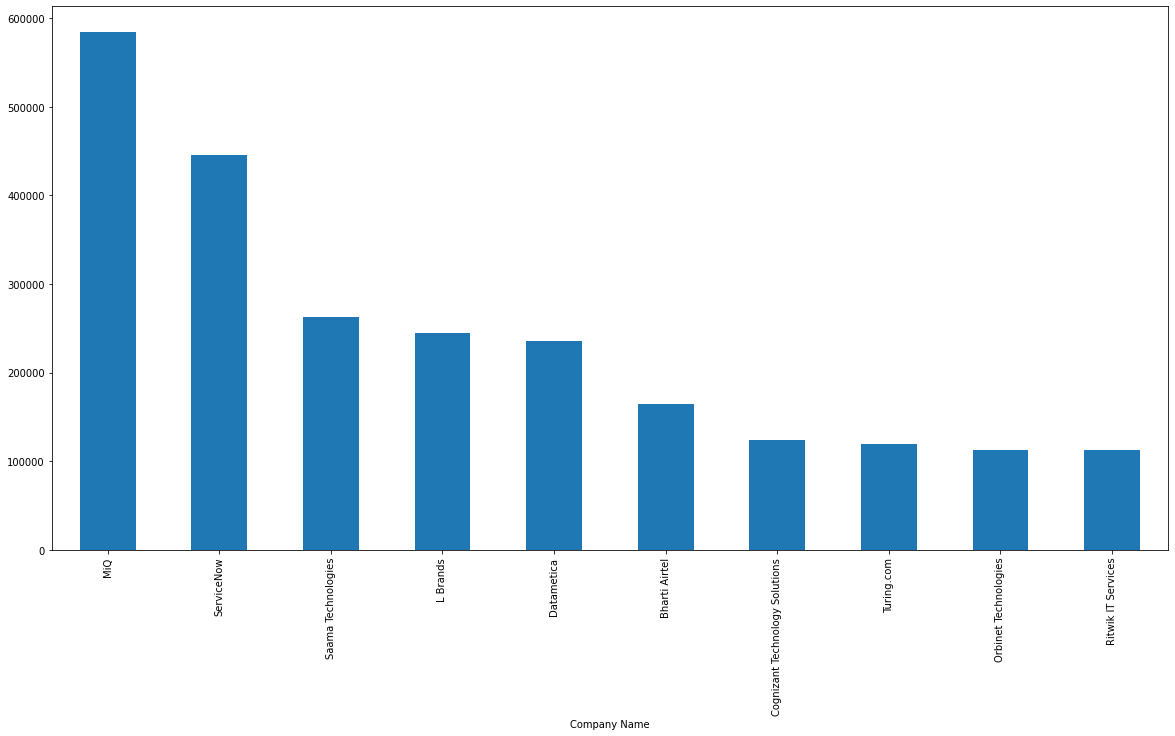

In [21]:
plt.figure(figsize=(20, 10))
df.groupby('Company Name').mean()['Salary ($/yr)'].sort_values(ascending=False).head(10).plot(kind='bar')

### Plotting average salaries for each location

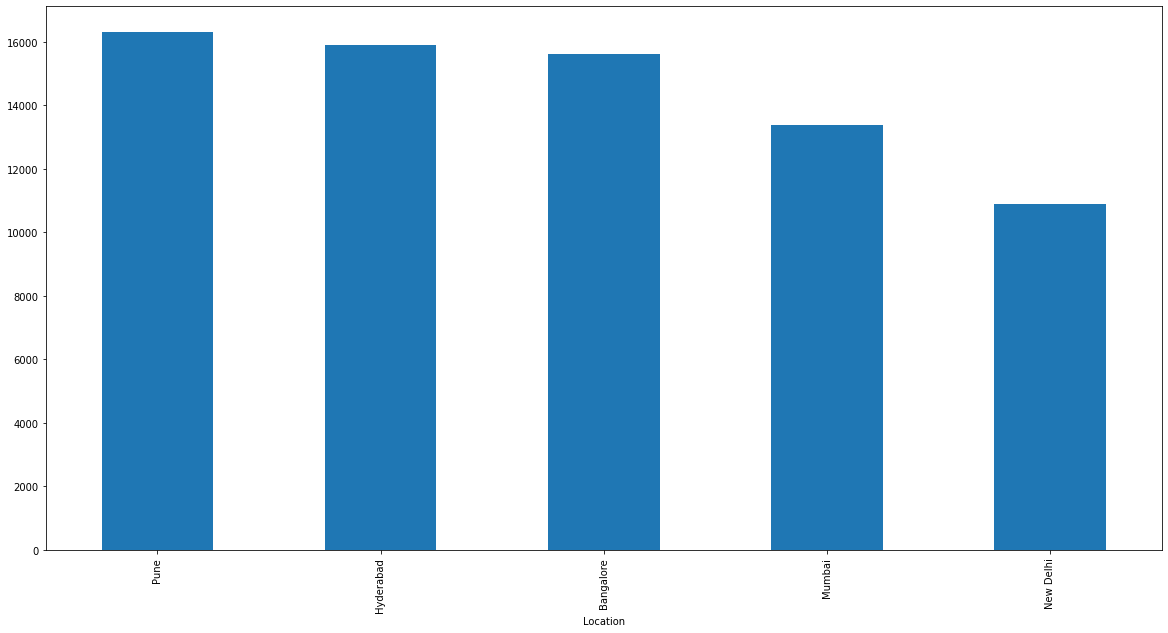

In [22]:
plt.figure(figsize=(20, 10))
df.groupby('Location').mean()['Salary ($/yr)'].sort_values(ascending=False).plot(kind='bar')
plt.show()

### Plotting top 6 high paying companies

In [23]:
x = df.groupby('Company Name').mean()['Salary ($/yr)'].sort_values(ascending=False).head(6)
fig = px.bar(x, title="Top 6 High Paying Companies")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### Plotting top 6 less paying companies

In [24]:
x = df.groupby('Company Name').mean()['Salary ($/yr)'].sort_values(ascending=True).head(5)
fig = px.bar(x, title="Top 5 Less Paying Companies")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()